# Статистический анализ данных  интернет-магазина «Стримчик»

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Спрос на игры в разных регионах может отличаться, поэтому необходимо учитывать особенности потенциальных потребителей.   

Цель данного анализа - выбрать потенциально популярный продукт и спланировать рекламную кампанию на 2017-й год.

В нашем распоряжении исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и платформах.

Для достижения поставленной цели нам необходимо решить следующие задачи:
* загрузить и обработать данные, которые мы получили;
* провести исследовательский анализ данных;
* составить портреты пользователей регионов;
* проверить основные гипотезы;
* выявить определяющие успешность игры закономерности.



In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns


import matplotlib.animation as anim

In [2]:
plt.rcParams['figure.figsize'] = (13,8)

#### Загрузка данных

In [3]:
df = pd.read_csv('games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
    
Открыл файл и изучил общую информацию. В данных, которые мы получили, имеются пропуски в 6 из 11 колонок. В колонке 'user_score' неправильный тип данных.
</div>

#### Подготовка данных

In [6]:
df.columns=df.columns.str.lower()

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
    
Привел к нижнему регистру названия столбцов методом str.lower().
</div>

In [8]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#df=df.dropna(subset=['name'])

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

Отказался от идеи с удалением строк, где отсутствует имя, т.к. в ходе анализа нам это не помешает.
<div/>

In [10]:
#df[df['name']=='Need for Speed: Most Wanted'][['platform','rating']]

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Заполнять пропуски в колонке с рейтингом не стал, так как от платформы к платформе содержание игры может отличаться, соответственно и рейтинг

In [11]:
df[df['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [12]:
df[df['rating'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6766 entries, 1 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6764 non-null   object 
 1   platform         6766 non-null   object 
 2   year_of_release  6678 non-null   float64
 3   genre            6764 non-null   object 
 4   na_sales         6766 non-null   float64
 5   eu_sales         6766 non-null   float64
 6   jp_sales         6766 non-null   float64
 7   other_sales      6766 non-null   float64
 8   critic_score     83 non-null     float64
 9   user_score       136 non-null    object 
 10  rating           0 non-null      object 
dtypes: float64(6), object(5)
memory usage: 634.3+ KB


In [13]:
df['rating']=df['rating'].fillna('unknown')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

Еще раз изучил пропуски в колонке с рейтингом и информацию об этом рейтинге. Как оказалось, этот рейтинг играм присваивает организация в Северной и Центральной Америке. Возможно, данные в датафрейм попадают из разных источников, поэтому этот рейтинг указан не везде. Причину этих пропусков установить не представляется возможным, поэтому пропуски заполнил значением 'unknown'.
</div>

In [14]:
df[df['name']=="Strongest Tokyo University Shogi DS"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown


In [15]:
df.loc[15957,'year_of_release']=2007

In [16]:
df.loc[15957]

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                 2007.0
genre                                           Action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                       NaN
user_score                                         NaN
rating                                         unknown
Name: 15957, dtype: object

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
В ходе исследования обнаружил, что у одной из игр указана неправильная дата. Данное значение было решено исправить, чтобы не искажать результаты исследования.

In [17]:
df=df.dropna(subset=['year_of_release'])

In [18]:
df['user_score']=df['user_score'].replace('tbd',np.nan)

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 


Аббревиатура в колонке с рейтингом пользователей означает "to be determined", т.е. рейтинг не определен, поэтому было решено заменить эти значения на NaN значения, чтобы затем было возможно применять агрегирующие функции к колонке. 
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

Причину пропусков в столбцах 'user_score' и 'critic_score' установить тоже не представляется возможным, поэтому пропуски в столцах с оценками критиков и пользователей заполнять не стал.
<div/>

In [19]:
df=df.astype({
    'user_score':'float32','critic_score':'float32',
    'na_sales':'float32','eu_sales':'float32',
    'jp_sales':'float32','other_sales':'float32', 
    'year_of_release':'int'
})

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Заменил типы данных в 'user_score', 'critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' на float32 с целью экономии памяти. Тип данных в 'year_of_release' исправил на 'int' (было сложнее всего из - за пропусков).

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float32
 5   eu_sales         16446 non-null  float32
 6   jp_sales         16446 non-null  float32
 7   other_sales      16446 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           16446 non-null  object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


In [21]:
df['sales_sum'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец

In [22]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


In [23]:
df=df.drop_duplicates(subset=['name', 'platform','year_of_release'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7982 non-null   float32
 9   user_score       7462 non-null   float32
 10  rating           16444 non-null  object 
 11  sales_sum        16444 non-null  float32
dtypes: float32(7), int32(1), object(4)
memory usage: 1.1+ MB


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
    
После подготовки данных:
* привел в нужный вид наименования колонок в таблице;
* заполнил пропуски там, где это было возможно;
* привел к нужным типам данные в столбцах;
* нашел неявные дубликаты и удалил их.
</div>

#### Исследовательский анализ данных

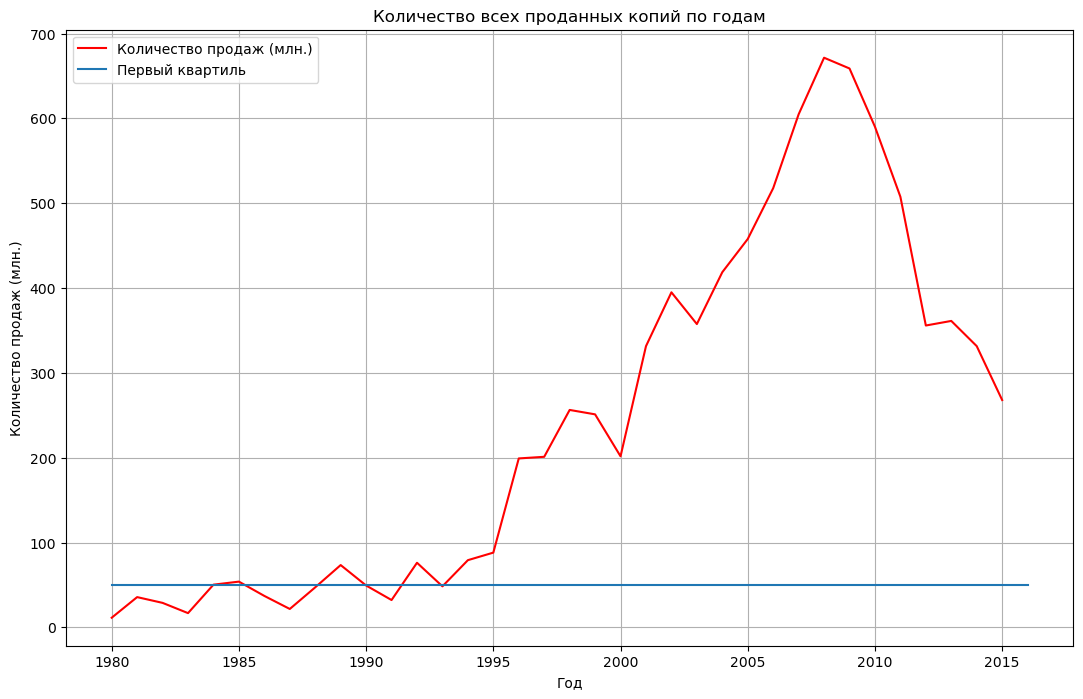

In [25]:
df.groupby('year_of_release')['sales_sum'].sum().loc[:2015].plot(grid=True,color='red');

x = [1980,2016]
y = [df.groupby('year_of_release')['sales_sum'].sum().quantile(0.25),
     df.groupby('year_of_release')['sales_sum'].sum().quantile(0.25)]

plt.plot(x, y);
plt.title('Количество всех проданных копий по годам')
plt.xlabel("Год");
plt.ylabel("Количество продаж (млн.)");
plt.legend(['Количество продаж (млн.)','Первый квартиль']);

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Построил график с двумя кривыми: красная описывает количество проданных копий, синяя - первый квартиль значений количества проданных копий в год. Если необходимо отбросить продажи за какой либо период, то лучше будет удалить продажи совершенные до 1993 года (я в своем анализе этого делать не стал).

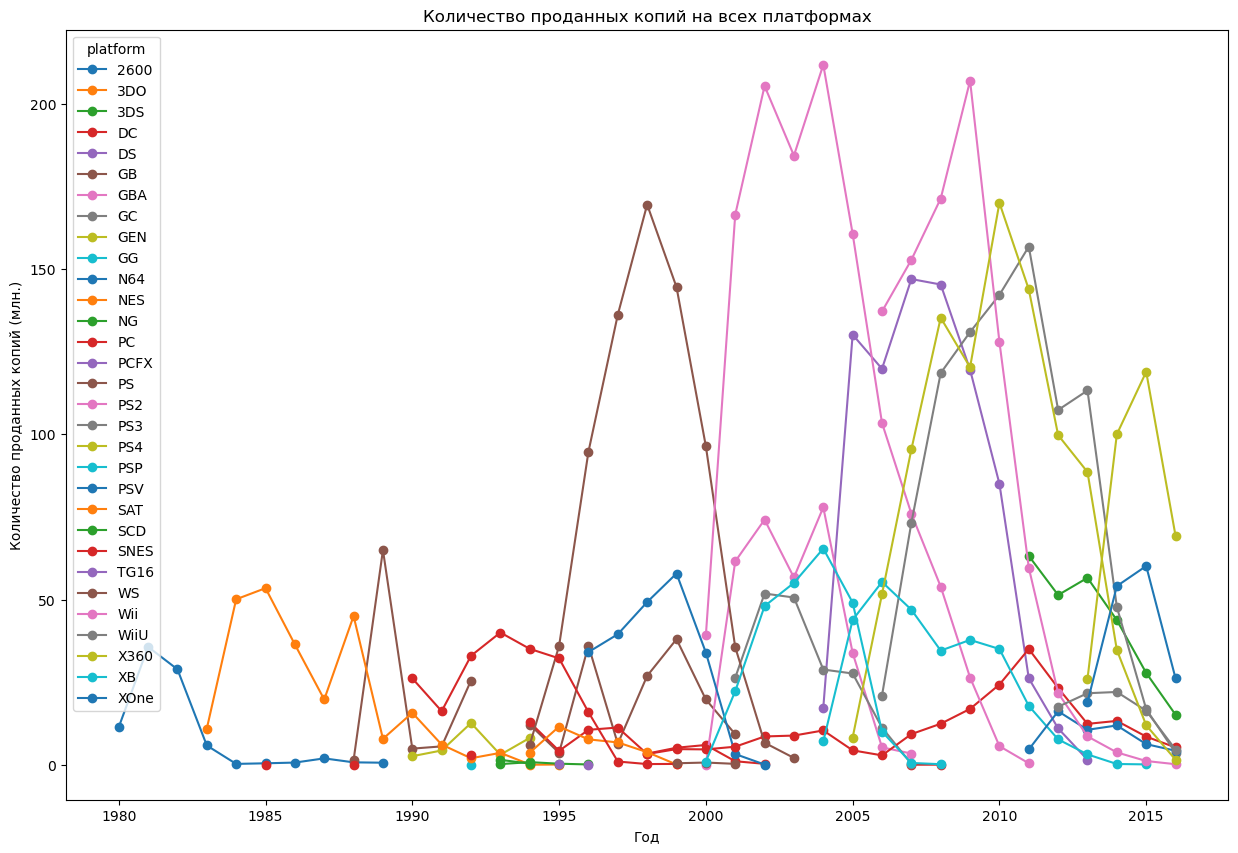

In [26]:
pd.pivot_table(df, values='sales_sum', columns='platform',index='year_of_release',aggfunc="sum").plot(figsize=(15,10),marker="o");
plt.xlabel('Год');
plt.ylabel('Количество проданных копий (млн.)');
plt.title('Количество проданных копий на всех платформах');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b</b> 

Построил график на котором отобразил данные по количеству проданных копий за все время на всех платформах. По графику можно сказать лишь то, что у всех кривых, которые отражают количество проданных копий за год, есть схожий паттерн и то, что количество платформ со временем увеличилось, но чтобы более детально разобрать паттерн стоит выделить какую то часть из них и разобрать, что будет сделано дальше.

</div>

In [27]:
df.groupby('platform')['sales_sum'].sum().sort_values(ascending=False)[:10]

platform
PS2     1233.559937
X360     961.239990
PS3      931.330017
Wii      891.179993
DS       802.780029
PS       727.580017
PS4      314.140015
GBA      312.880005
PSP      289.529999
3DS      257.809998
Name: sales_sum, dtype: float32

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Определил 10 платформ с самым большим количеством проданных копий.

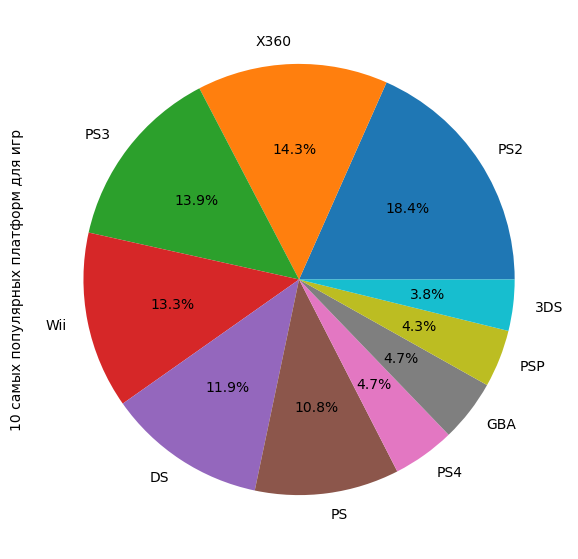

In [28]:
df.groupby('platform')['sales_sum'].sum().sort_values(ascending=False)[:10].plot(
    kind='pie',figsize=(7,7),label='10 самых популярных платформ для игр', autopct='%1.1f%%'
);

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

Построил круговую диаграмму, которая показывает распределение продаж игр по 10 самым популярным платформам. Основываясь на данных, которые отображены на диаграмме можно сказать, что платформы 'PS2', 'X360', 'PS3' 'Wii' занимают большую часть рынка среди 10 крупнейших платформ по итогам 36 лет. Самая малая доли у 'PS4', 'GBA', 'PSP' и '3DS'. Если в случае с 'PS4' это можно объяснить небольшим сроком присутствия на рынке, то в случае 'GBA', 'PSP' и '3DS' это может объясняться низким спросом на такого рода товары в период, когда они еще морально не устарели, либо указывать на то, что данные продукты были ориентированнны на более узкий сегмент рынка.

</div>

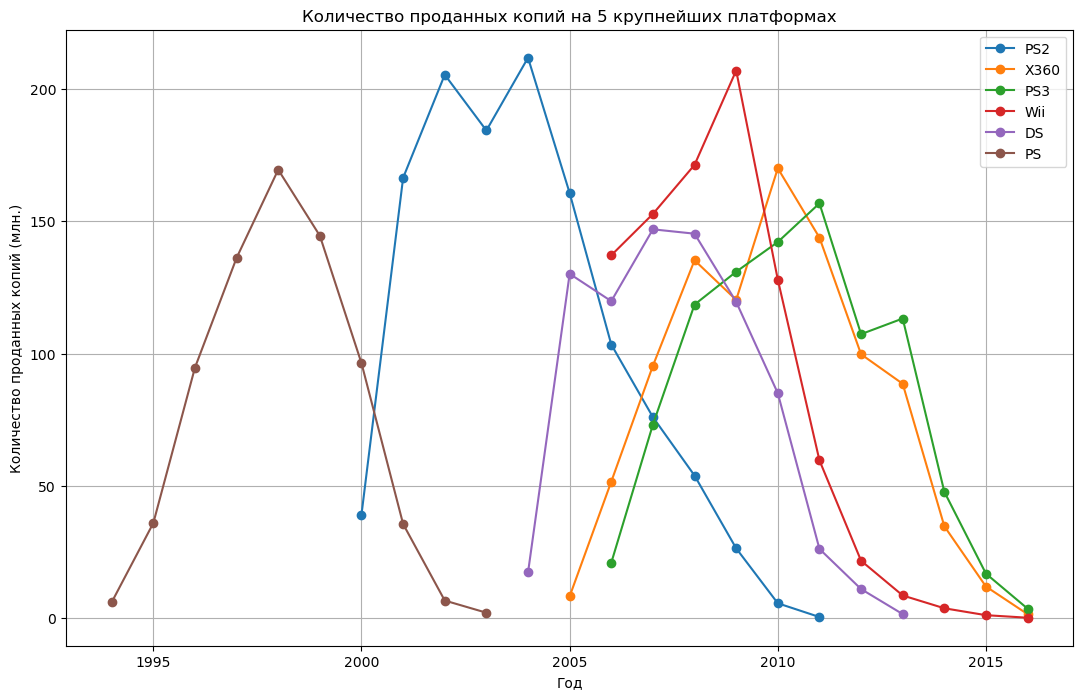

In [29]:
df.query('platform=="PS2"').groupby('year_of_release')['sales_sum'].sum().plot(marker="o");
df.query('platform=="X360"').groupby('year_of_release')['sales_sum'].sum().plot(marker="o");
df.query('platform=="PS3"').groupby('year_of_release')['sales_sum'].sum().plot(marker="o");
df.query('platform=="Wii"').groupby('year_of_release')['sales_sum'].sum().plot(marker="o");
df.query('platform=="DS"').groupby('year_of_release')['sales_sum'].sum().plot(marker="o");
df.query('platform=="PS"').groupby('year_of_release')['sales_sum'].sum().plot(grid=True,marker="o");

plt.xlabel('Год');
plt.ylabel('Количество проданных копий (млн.)');
plt.title('Количество проданных копий на 5 крупнейших платформах');
plt.legend(['PS2','X360','PS3','Wii','DS','PS']);

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

Построил график на котором отобразил данные по количеству проданных копий за все время игр на 5 крупнейших платформ. Теперь на графике паттерн угадывается и видно, что у тех платформ, что были выбраны, есть некоторый жизненный цикл, чтобы точнее его определить, необходимо провести дополнительные манипуляции с данными, что и будет сделано далее.  
    
</div>

In [30]:
biggest = df.groupby('platform')['sales_sum'].sum().sort_values(ascending=False)[:5].index

In [31]:
biggest

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

In [32]:
trasnp_table=pd.pivot_table(df, values='sales_sum', columns='platform',index='year_of_release',aggfunc="sum")

In [33]:
trasnp_table

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.879999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.840000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.670000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.940000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.740000,NaN,NaN,NaN,NaN,1.430000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
trasnp_table_sorted = trasnp_table.apply(lambda x: pd.Series(x.dropna().values))

In [35]:
trasnp_table_sorted=trasnp_table_sorted.set_index(trasnp_table_sorted.index+1)

In [36]:
trasnp_table_sorted.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
1,11.380000,0.02,63.199997,3.38,17.270000,1.430000,0.070000,26.339998,2.600000,0.04,...,3.65,1.50,26.150000,0.16,0.46,137.149994,17.559999,8.250000,0.990000,18.960001
2,35.680000,0.08,51.360001,5.16,130.139999,64.970001,61.529999,51.810001,4.330000,NaN,...,11.57,0.36,16.219999,NaN,0.68,152.770004,21.650000,51.619999,22.260000,54.070000
3,28.879999,NaN,56.570000,5.99,119.809998,4.890000,74.159996,50.609997,12.639999,NaN,...,7.69,NaN,32.980000,NaN,0.28,171.320007,22.030001,95.409996,48.009998,60.139999
4,5.840000,NaN,43.759998,1.07,146.959991,5.570000,56.669998,28.820000,3.040000,NaN,...,6.77,NaN,40.020000,NaN,NaN,206.970001,16.350000,135.259995,55.040001,26.150000
5,0.270000,NaN,27.780001,0.29,145.309998,25.490000,77.910004,27.619999,8.130000,NaN,...,3.82,NaN,35.079998,NaN,NaN,127.949997,4.600000,120.290001,65.419998,NaN


In [37]:
biggest

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

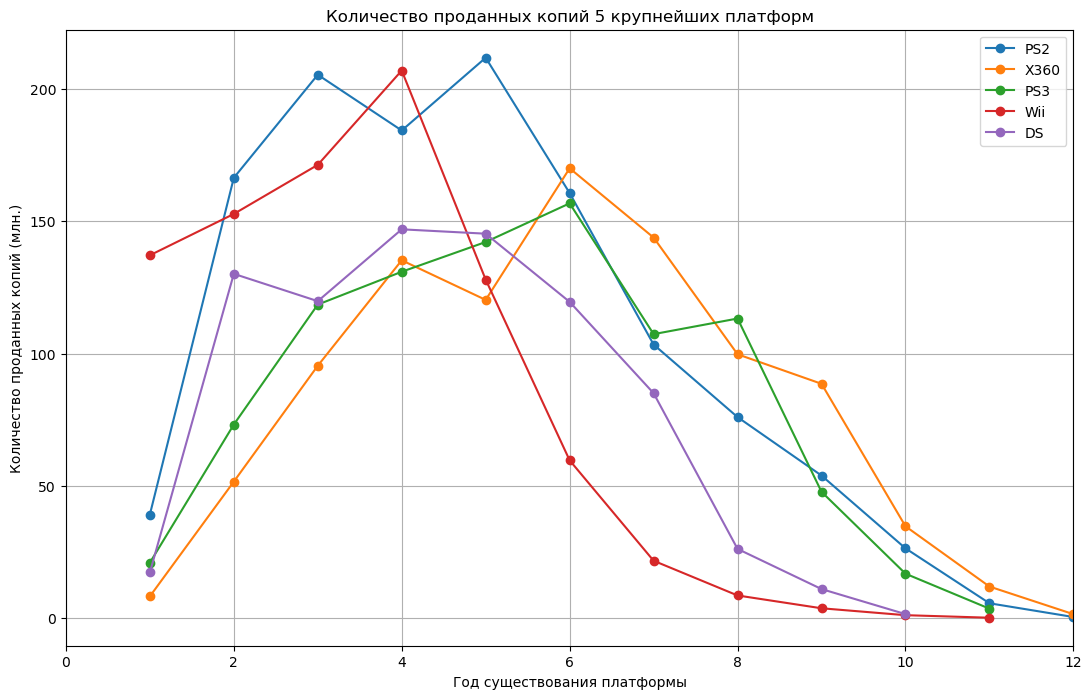

In [38]:
for i in biggest:
    trasnp_table_sorted[i].plot(grid=True,
                                legend=True,
                                marker='o')
plt.xlim([0,12]);
plt.xlabel('Год существования платформы');
plt.ylabel('Количество проданных копий (млн.)');
plt.title('Количество проданных копий 5 крупнейших платформ');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Построил график, который, как мне показалось, лучше демонстрирует характерных срок жизни платформы (для его построения использовались данные по продажам 5 крупнейших платформ).

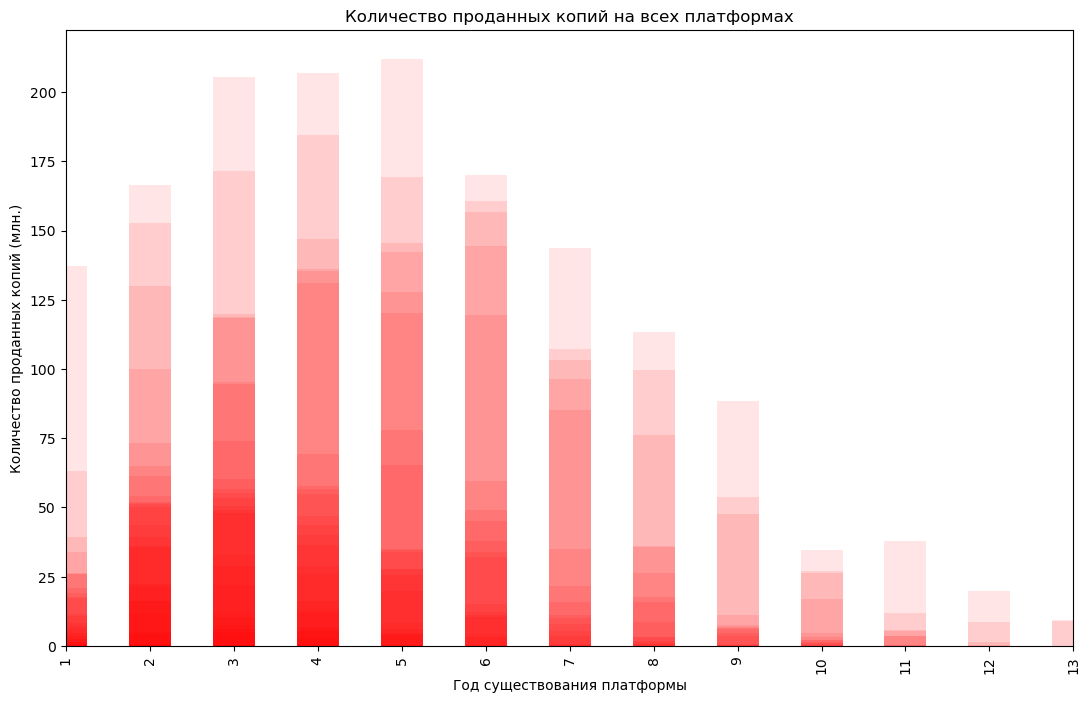

In [39]:
for i in df.groupby('platform')['sales_sum'].sum().index:
    trasnp_table_sorted[i].plot(kind='bar',
                                alpha=0.1, 
                                color='r')
plt.xlim([0,12]);
plt.xlabel('Год существования платформы');
plt.ylabel('Количество проданных копий (млн.)');
plt.title('Количество проданных копий на всех платформах');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Построил график, который так же демонстрирует характерных срок жизни платформы, только в другой форме (для его построения использовались данные по продажам всех платформ).

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 


На построенной столбчатой диаграмме теперь лучше прослеживаются жизненный цикл и его паттерн. Чем интенсивнее цвет в каждом из столбцов, тем чаще количество продаж достигало определенного значения за год "жизни" платформы. 
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

По представленным выше графикам можно сделать вывод о том, что характерным сроком существования платформы на рынке можно считать 8-10 лет, однако уже после 4-6 лет продажи игр на эти платформы начинают значительно снижаться.   
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
PS4 и XOne лидируют по продажам, обогнав в 2014 году крупнейшие платформы, хотя и вышли лишь в 2013 году. Учитывая то, что продажи начинают снижаться только после 4 лет существования платформы, предпочтительнее было бы выбрать именно их.

In [40]:
def first_year_plat(platf):
    return df[df['platform']==platf]['year_of_release'].min()

df['first_year_plat']=df['platform'].apply(first_year_plat)

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

Написал функцию, которая находит первый встретившийся год у платформы в датафрейме, который и буду принимать за год выпуска платформы. 
</div>

In [41]:
after2010 = df.query('first_year_plat>2010')['platform'].unique()
#возможно стоит установить минимальный порог с 2012 

In [42]:
after2010

array(['PS4', '3DS', 'XOne', 'WiiU', 'PSV'], dtype=object)

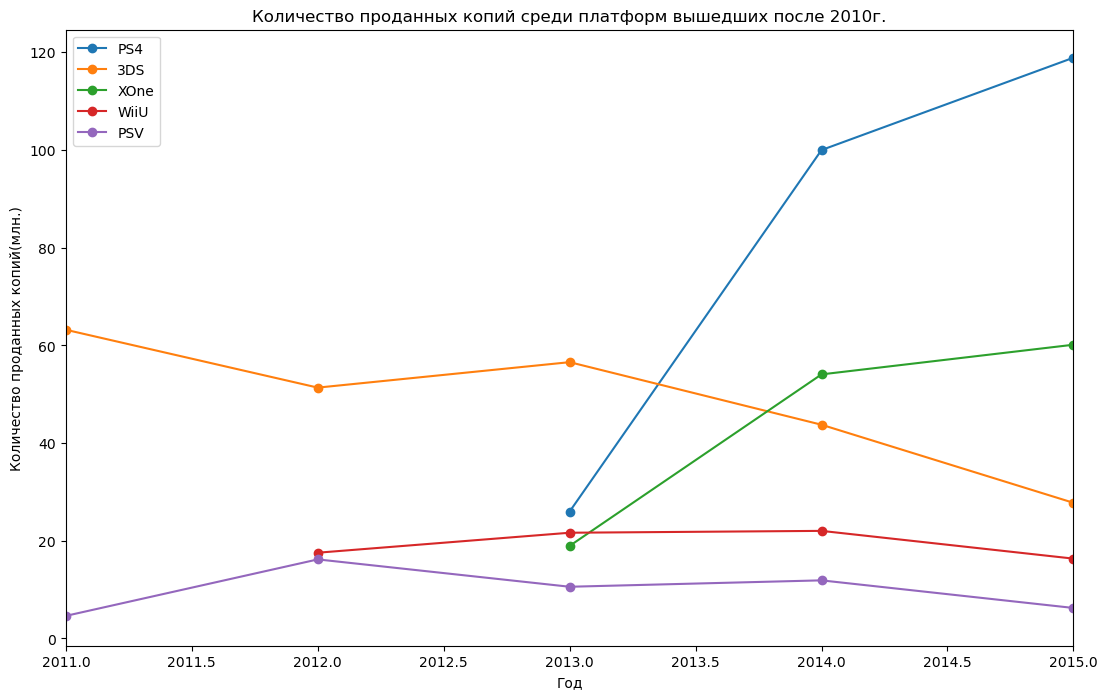

In [43]:
for i in after2010:
    df[df['platform']==i].groupby('year_of_release')['sales_sum'].sum().plot(marker="o")
plt.xlim([2011,2015])
plt.legend(after2010);

#plt.annotate('Выход платформ', xy=(2013, 30),  xycoords='data',
#            xytext=(2012.5, 50), textcoords='data',
#            arrowprops=dict(facecolor='pink')); #координаты xytext

plt.xlabel('Год');
plt.ylabel('Количество проданных копий(млн.)');
plt.title('Количество проданных копий среди платформ вышедших после 2010г.');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 


Построил график, который отображает количество проданных копий среди платформ вышедших после 2010г. Этот график отлично демонстрирует поведение покупателей вышеупомянутых типов платформ (нишевых и массовых). Видно, что у '3DS' 'WiiU' и 'PSV' разброс значений количества проданных копий небольшой и количество не растет, тогда как у 'PS4' и 'XOne' разброс значений количества проданных копий больше и количество растет с каждым годом.

</div>

In [44]:
listt=[]
for i in df['platform'].unique():
    listt.append(df[df['platform']==i]['sales_sum'])

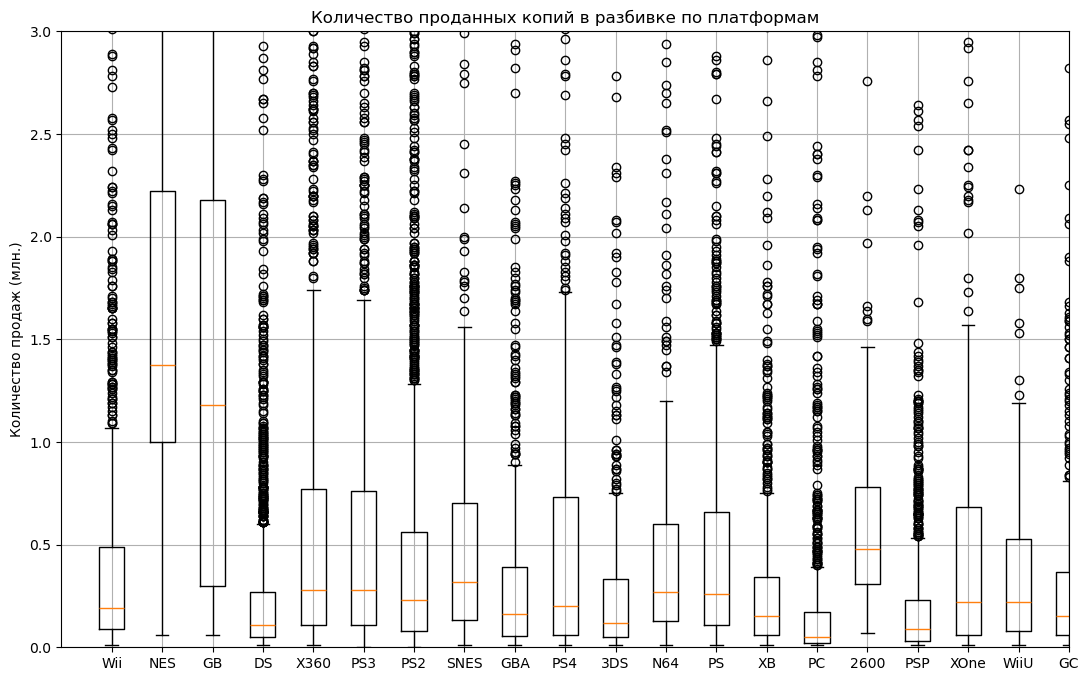

In [45]:
fig, ax = plt.subplots()
ax.boxplot(listt[:])
ax.set_xticklabels(df['platform'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.grid();
plt.ylim(0,3);
plt.title('Количество проданных копий в разбивке по платформам');
plt.xlim(0,20);

In [46]:
df[df['platform']=="NES"]['year_of_release'].max()

1994

In [47]:
df[df['platform']=="GB"]['year_of_release'].max()

2001

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

    
Построил график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Органичил значения количества продаж так, чтобы отсечь выбросы и можно было увидеть медиану и 75% квартиль. Учитывая данные, которые отображены на графике, можно сказать, что среди всех платформ "NES" и "GB" - самые успешные, 
Среди современных платформ лидируют 'PS4' и 'XOne', медианы и 75% квартили которых уже приблизилсь к значениям своих предшественников.
</div>

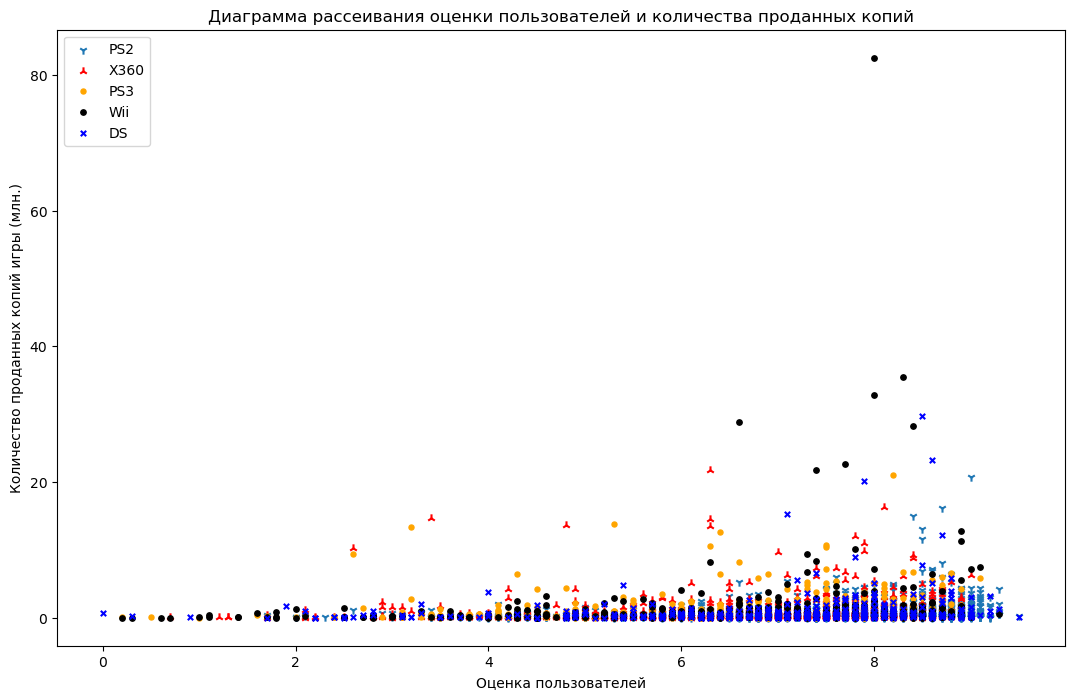

In [48]:
#x = range(100)
#y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df[df['platform']=='PS2']['user_score'],
            df[df['platform']=='PS2']['sales_sum'], marker="1", label='PS2')

ax1.scatter(df[df['platform']=='X360']['user_score'],
            df[df['platform']=='X360']['sales_sum'],  c='r', marker="2", label='X360')

ax1.scatter(df[df['platform']=='PS3']['user_score'],
            df[df['platform']=='PS3']['sales_sum'], s=13, c='orange', marker="o", label='PS3')

ax1.scatter(df[df['platform']=='Wii']['user_score'],
            df[df['platform']=='Wii']['sales_sum'], s=15, c='black', marker="o", label='Wii')

ax1.scatter(df[df['platform']=='DS']['user_score'],
            df[df['platform']=='DS']['sales_sum'], s=15, c='b', marker="x", label='DS')


#plt.xlim(5,10)            
plt.legend(loc='upper left');
plt.xlabel('Оценка пользователей');
plt.ylabel('Количество проданных копий игры (млн.)');
plt.title('Диаграмма рассеивания оценки пользователей и количества проданных копий');

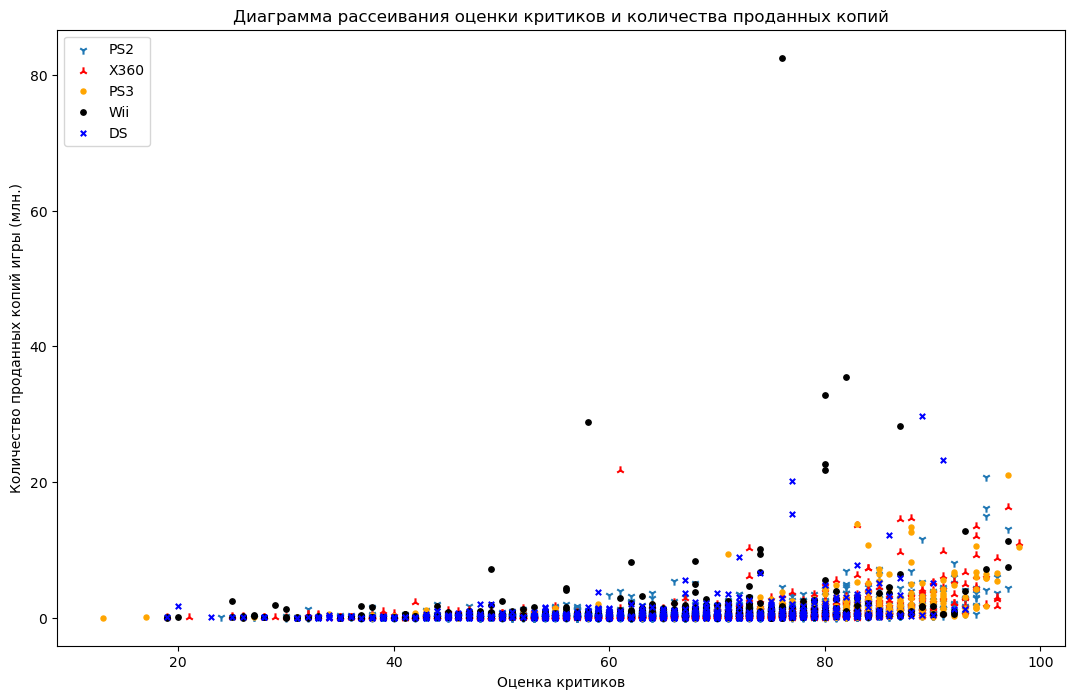

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df[df['platform']=='PS2']['critic_score'],
            df[df['platform']=='PS2']['sales_sum'], marker="1", label='PS2')

ax.scatter(df[df['platform']=='X360']['critic_score'],
            df[df['platform']=='X360']['sales_sum'],  c='r', marker="2", label='X360')

ax.scatter(df[df['platform']=='PS3']['critic_score'],
            df[df['platform']=='PS3']['sales_sum'], s=13, c='orange', marker="o", label='PS3')

ax.scatter(df[df['platform']=='Wii']['critic_score'],
            df[df['platform']=='Wii']['sales_sum'], s=15, c='black', marker="o", label='Wii')

ax.scatter(df[df['platform']=='DS']['critic_score'],
            df[df['platform']=='DS']['sales_sum'], s=15, c='b', marker="x", label='DS')

         
plt.legend(loc='upper left');
plt.xlabel('Оценка критиков');
plt.ylabel('Количество проданных копий игры (млн.)');
plt.title('Диаграмма рассеивания оценки критиков и количества проданных копий');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Построил две диаграммы рассеивания: оценки пользователей - количества проданных копий и оценки критиков - количества проданных копий по 5 крупнейшим платформам. Корреляцию между отзывами и продажами увидеть не смог.

In [50]:
df_corr=df[['critic_score','user_score','sales_sum']]

In [51]:
df_corr

,critic_score,user_score,sales_sum
0,76.0,8.0,82.539993
1,NaN,NaN,40.240002
2,82.0,8.3,35.520000
3,80.0,8.0,32.770000
4,NaN,NaN,31.380001
...,...,...,...
16710,NaN,NaN,0.010000
16711,NaN,NaN,0.010000
16712,NaN,NaN,0.010000
16713,NaN,NaN,0.010000


In [52]:
df_corr.corr()

,critic_score,user_score,sales_sum
critic_score,1.000000,0.579920,0.245414
user_score,0.579920,1.000000,0.087935
sales_sum,0.245414,0.087935,1.000000


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Посчитал корреляцию между всеми продажами и оценками пользователей и корреляцию между всеми продажами и оценками критиков.

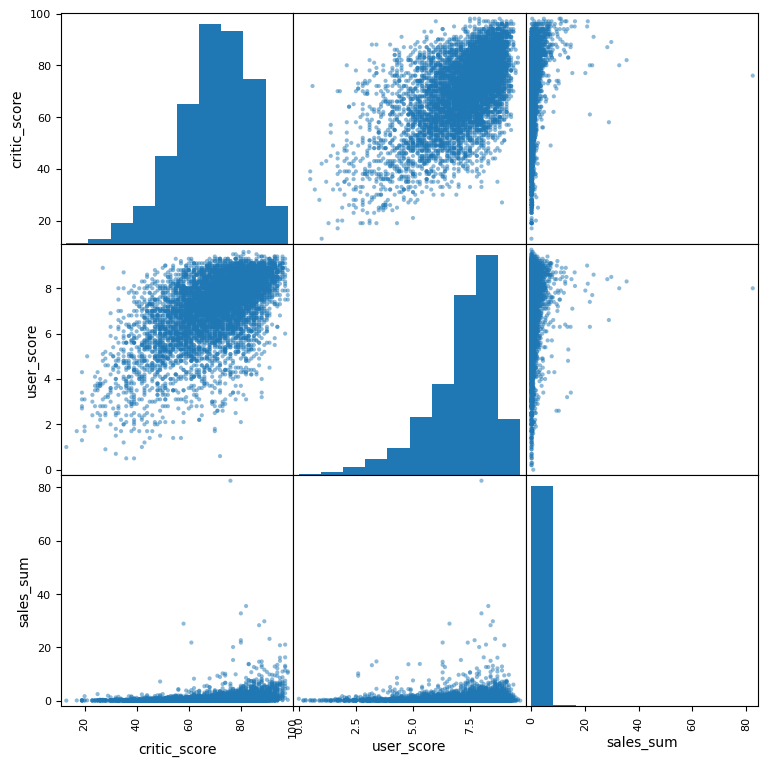

In [53]:
pd.plotting.scatter_matrix(df_corr,figsize=(9,9));

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Построил матирицу с диаграмм рассеивания между всеми продажами и оценками пользователей и между всеми продажами и оценками критиков.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Исходя из данных по всем продажам, можно сказать, что корреляция почти отсутствует между продажами и оценками. Далее провел аналогичный анализ по одной из платформ.

In [54]:
df[df['platform']=="X360"]['sales_sum'].describe()

count    1232.000000
mean        0.780227
std         1.632119
min         0.010000
25%         0.110000
50%         0.280000
75%         0.770000
max        21.820000
Name: sales_sum, dtype: float64

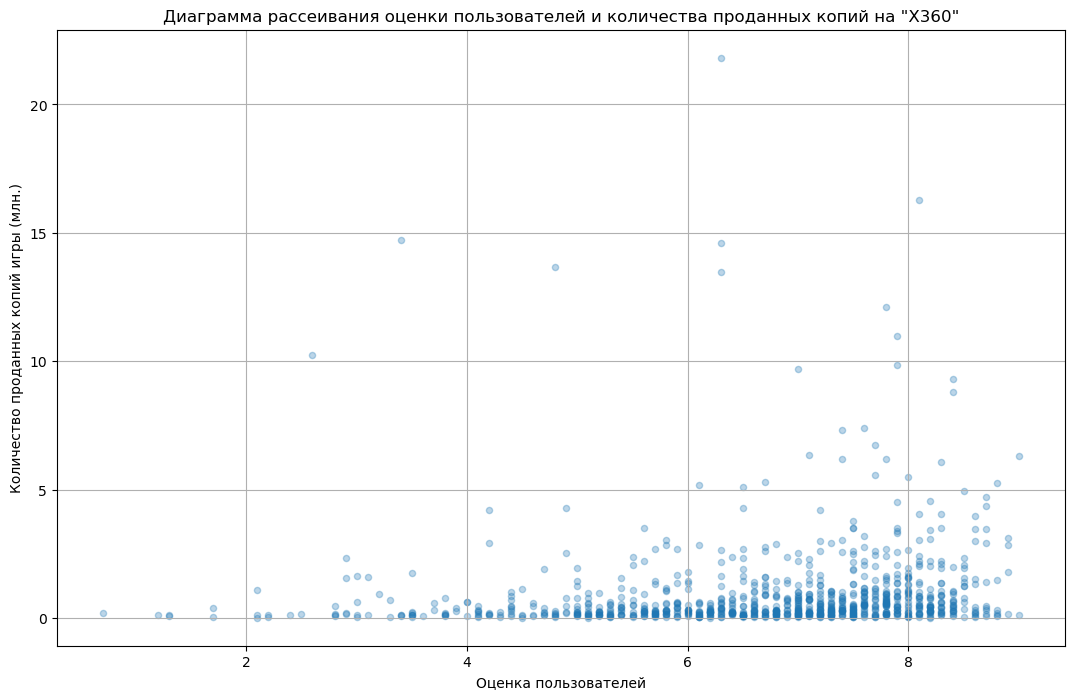

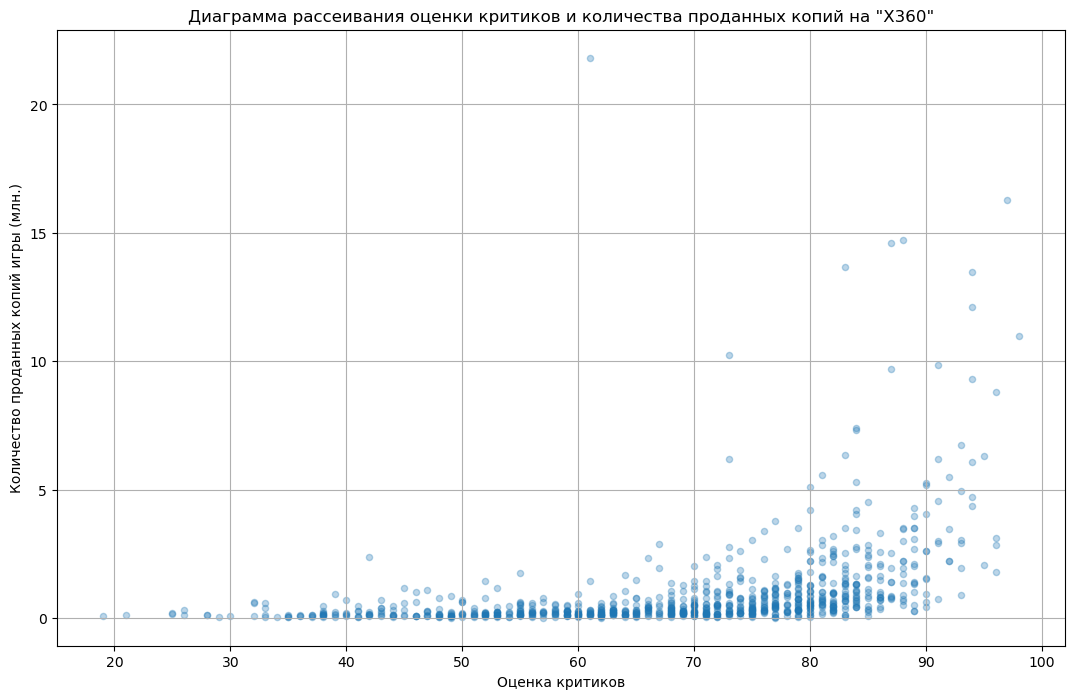

In [55]:
df[df['platform']=="X360"].plot(
    x='user_score',
    y='sales_sum',
    kind='scatter',
    alpha=0.3,
    grid=True,
    xlabel='Оценка пользователей',
    ylabel='Количество проданных копий игры (млн.)',
    title='Диаграмма рассеивания оценки пользователей и количества проданных копий на "X360"'
);


df[df['platform']=="X360"].plot(
    x='critic_score',
    y='sales_sum',
    kind='scatter',
    alpha=0.3,
    grid=True,
    xlabel='Оценка критиков',
    ylabel='Количество проданных копий игры (млн.)',
    title='Диаграмма рассеивания оценки критиков и количества проданных копий на "X360"'
);

In [56]:
df[df['platform']=="X360"][['sales_sum','user_score','critic_score']].corr()

,sales_sum,user_score,critic_score
sales_sum,1.000000,0.114187,0.392866
user_score,0.114187,1.000000,0.625020
critic_score,0.392866,0.625020,1.000000


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Исходя из данных по продажам платформы 'X360', можно сказать, что корреляция почти отсутствует между продажами и оценками и на этой платформе.

In [58]:
df=df.query('year_of_release>2011')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

Исследовательский анализ показал, что актуальным для анализа периодом стоит считать продажи не старше 3-5 лет, поэтому ограничим временное окно датами от 2012 года включительно.

</div>

In [59]:
listg=[]
for i in df['genre'].unique():
    listg.append(df[df['genre']==i]['sales_sum'])

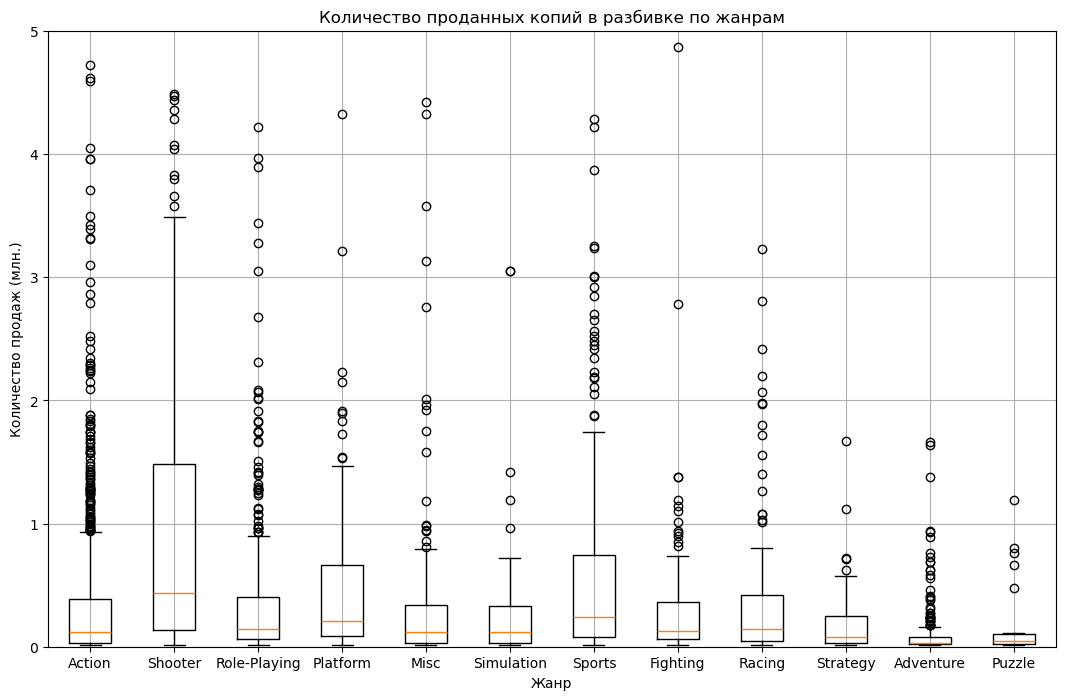

In [60]:
fig, ax = plt.subplots()
ax.boxplot(listg[:])
ax.set_xticklabels(df['genre'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Жанр');
plt.grid();
plt.ylim(0,5);
plt.title('Количество проданных копий в разбивке по жанрам');
#plt.xlim(0,20);

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

    
Построил график "ящик с усами" с количеством проданных копий в разбивке по жанрам. На графике теперь видно, что большим спросом пользуются игры жанров "Shooter", "Sports" и "Platform. Действительно, за высокими показателями общих продаж скрываяются множество мелких игр с низкими продажами как в случае с играми в жанрах "Action" и "Role-Playing"  и "Misc".
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
    
После проведенного исследовательского анализа данных можно сделать следующие выводы:
* платформы 'PS2', 'X360', 'PS3' 'Wii' занимают большую часть рынка среди 10 крупнейших платформ по итогам 36 лет. Самая малая доли у 'PS4', 'GBA', 'PSP' и '3DS’. 

* характерным сроком существования платформы на рынке можно считать 8-10 лет, однако уже после 4-6 лет продажи игр на эти платформы начинают значительно снижаться

* у '3DS' 'WiiU' и 'PSV' разброс значений количества проданных копий небольшой и количество не растет, тогда как у 'PS4' и 'XOne' разброс значений количества проданных копий больше и количество растет с каждым годом.

* среди всех платформ "NES" и "GB" - самые успешные, Среди современных платформ лидируют 'PS4' и 'XOne', медианы и 75% квартили которых уже приблизилсь к значениям своих предшественников.

* оценка критиков имеет слабое влияние на продажи, оценка пользователей на продажи не влияет.

* больше всего копий игр было продано в жанрах "Action", "Sports" и "Shooter", меньше всего копий было продано в жанрах "Strategy", "Adventure" и "Puzzle”

* за высокими показателями общих продаж скрываяются множество мелких игр с низкими продажами как в случае с играми в жанрах "Action" и "Role-Playing"  и "Misc" и большим спросом пользуются игры жанров "Shooter", "Sports" и "Platform. 
 
</div>

#### Портреты пользователей регионов  (NA, EU, JP)

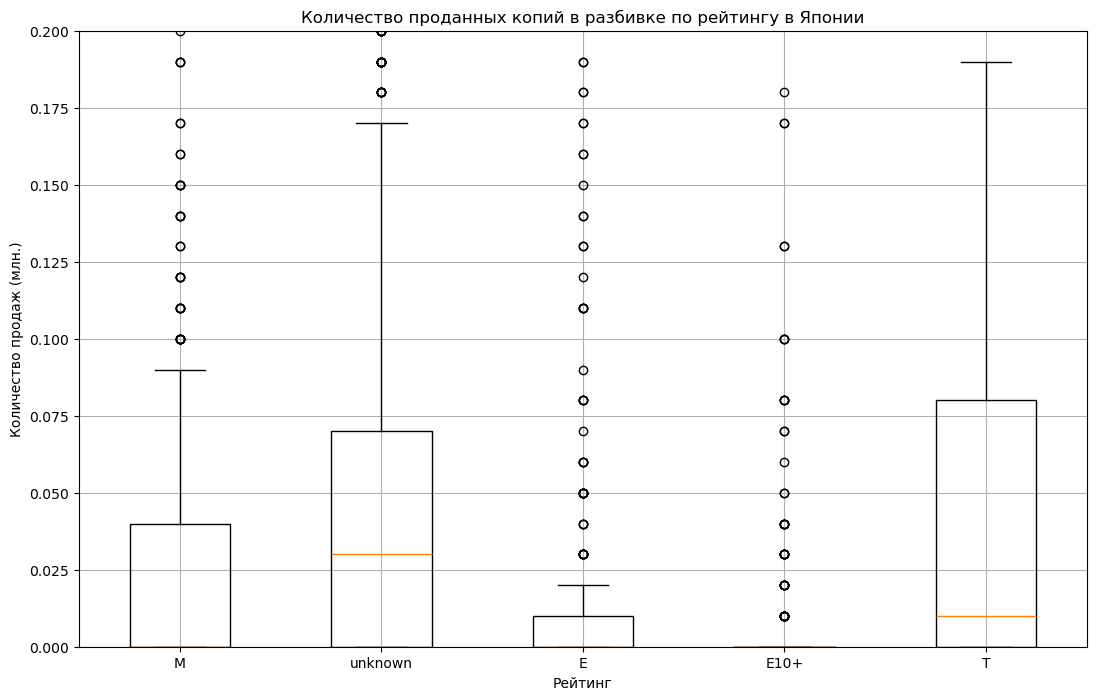

In [61]:
list_r_j=[]
for i in df['rating'].unique():
    list_r_j.append(df[df['rating']==i]['jp_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_r_j[:])
ax.set_xticklabels(df['rating'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Рейтинг');
plt.grid();
plt.ylim(0,0.2);
plt.title('Количество проданных копий в разбивке по рейтингу в Японии');

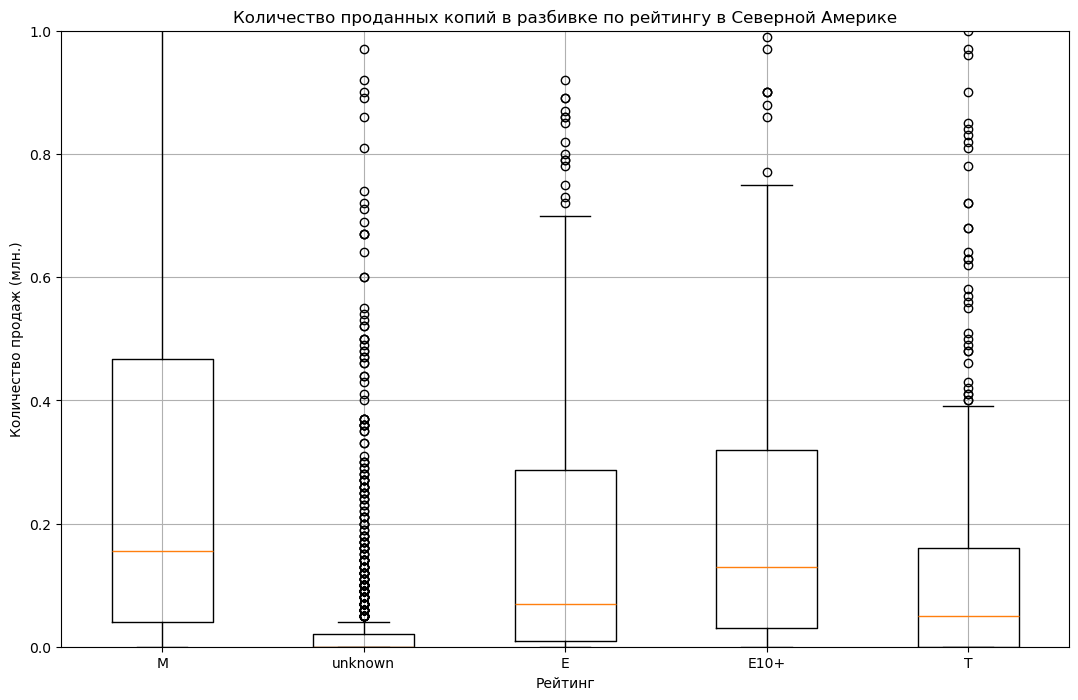

In [62]:
list_r_n=[]
for i in df['rating'].unique():
    list_r_n.append(df[df['rating']==i]['na_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_r_n[:])
ax.set_xticklabels(df['rating'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Рейтинг');
plt.grid();
plt.ylim(0,1);
plt.title('Количество проданных копий в разбивке по рейтингу в Северной Америке');

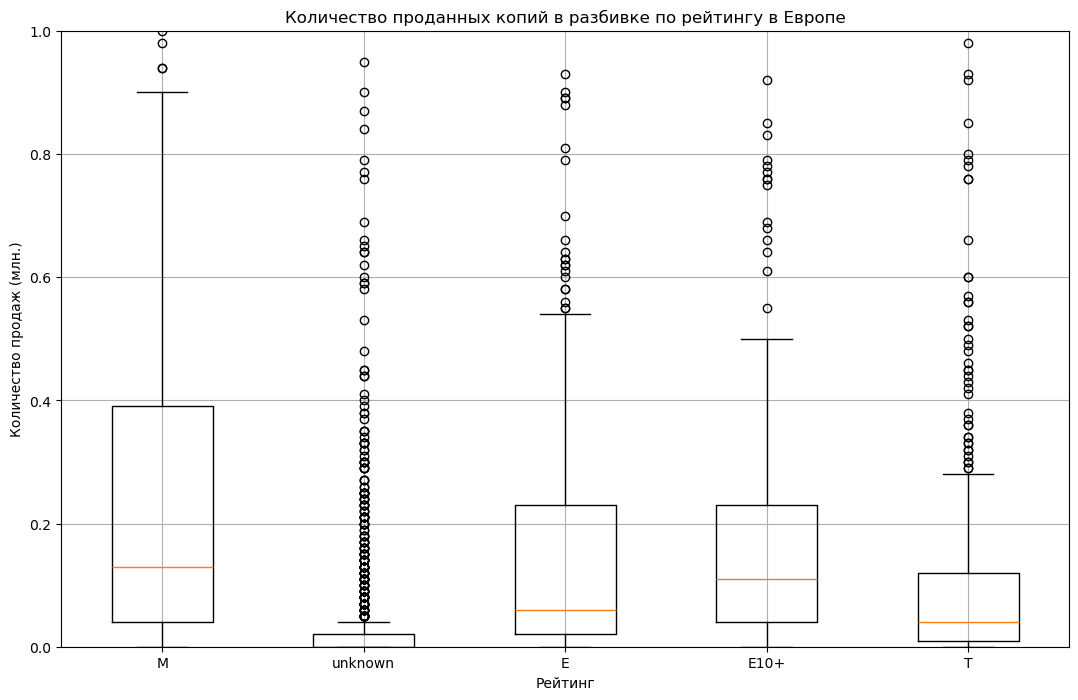

In [63]:
list_r_eu=[]
for i in df['rating'].unique():
    list_r_eu.append(df[df['rating']==i]['eu_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_r_eu[:])
ax.set_xticklabels(df['rating'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Рейтинг');
plt.grid();
plt.ylim(0,1);
plt.title('Количество проданных копий в разбивке по рейтингу в Европе');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 


Построив диаграммы "ящик с усами" по продажам игр в трех изучаемых регионах за установленный интервал в разрезе рейтинга, чтобы зрительно отсеять "шумы" в данных, можно заметить, что в Японии самые популярные игры - игры с рейтингом "Unknown", "T" и "M", а в Северной Америке, так же как и в Европе - "M", "E10" и "E". 



</div>

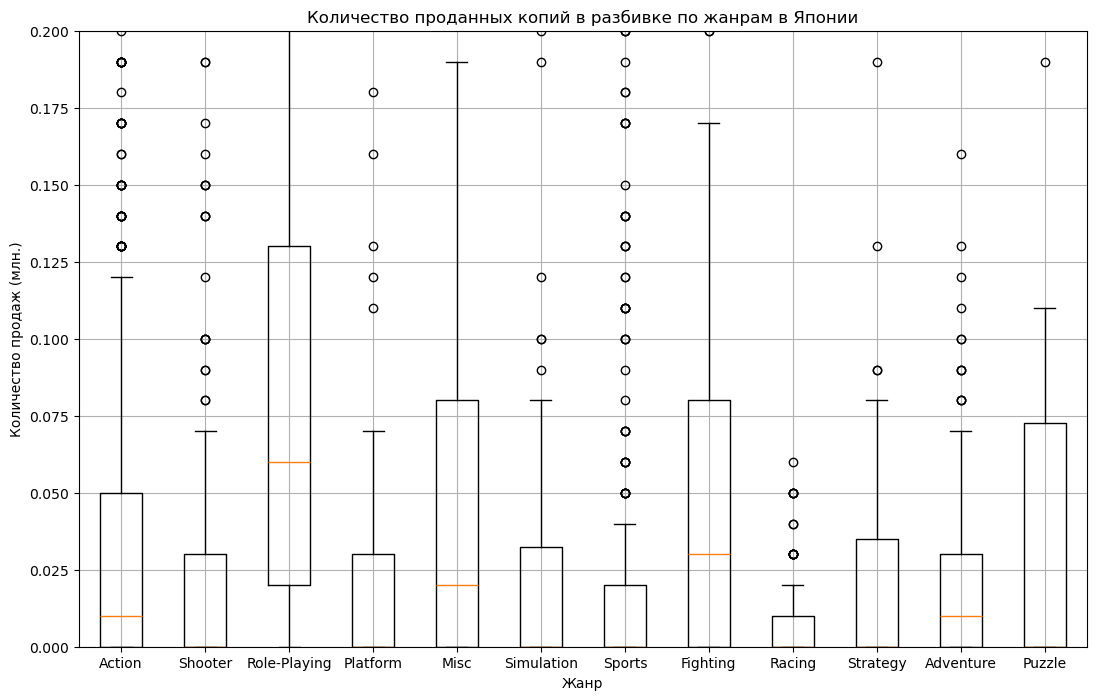

In [64]:
list_g_j=[]
for i in df['genre'].unique():
    list_g_j.append(df[df['genre']==i]['jp_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_g_j[:])
ax.set_xticklabels(df['genre'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Жанр');
plt.grid();
plt.ylim(0,0.2);
plt.title('Количество проданных копий в разбивке по жанрам в Японии');

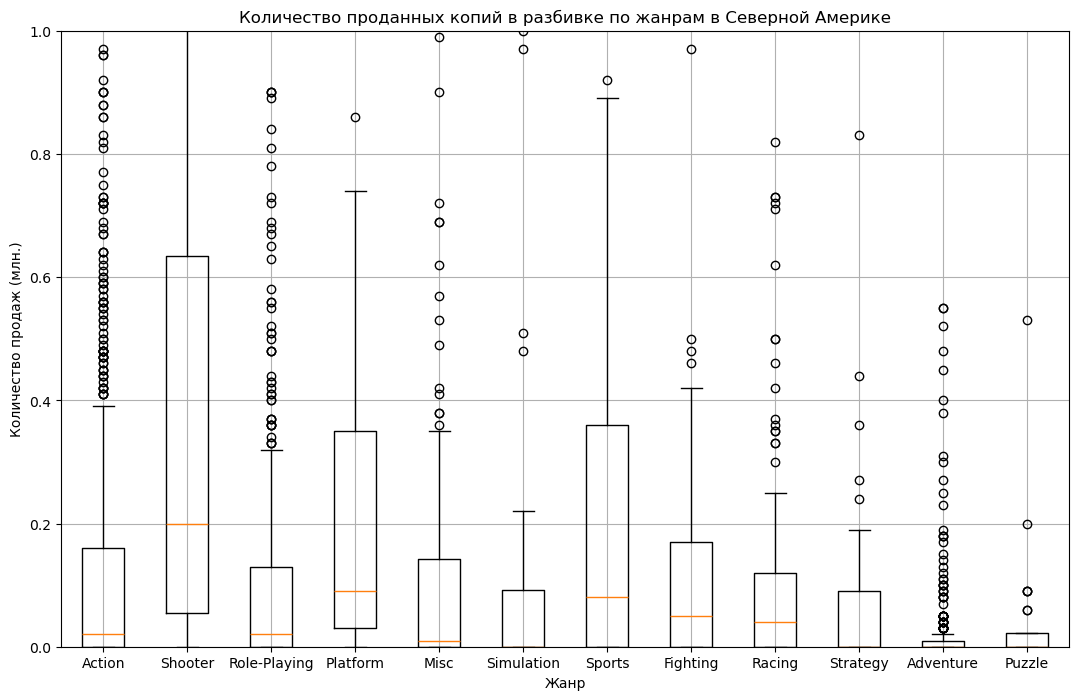

In [65]:
list_g_n=[]
for i in df['genre'].unique():
    list_g_n.append(df[df['genre']==i]['na_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_g_n[:])
ax.set_xticklabels(df['genre'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Жанр');
plt.grid();
plt.ylim(0,1);
plt.title('Количество проданных копий в разбивке по жанрам в Северной Америке');

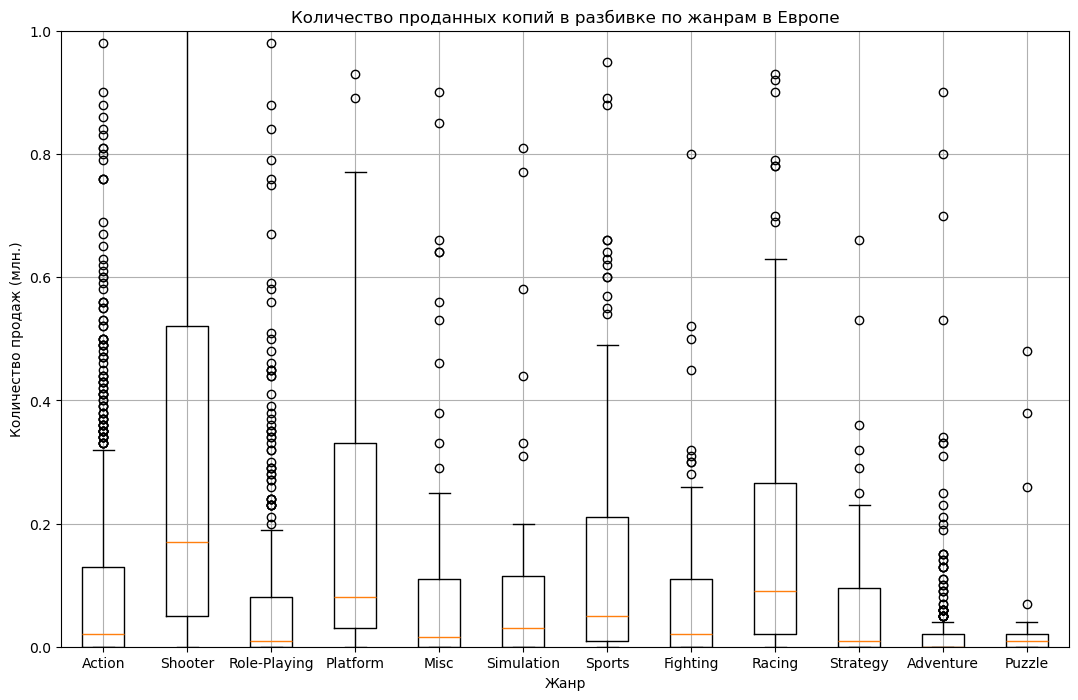

In [66]:
list_g_eu=[]
for i in df['genre'].unique():
    list_g_eu.append(df[df['genre']==i]['eu_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_g_eu[:])
ax.set_xticklabels(df['genre'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Жанр');
plt.grid();
plt.ylim(0,1);
plt.title('Количество проданных копий в разбивке по жанрам в Европе');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 


Построив диаграммы "ящик с усами" по продажам игр в трех изучаемых регионах за установленный интервал в разрезе жанров, можно заметить, что в Японии самые популярные игры - игры в жанрах "Role-Playing" "Misc", "Fighting" и "Puzzle". В Северной Америке и Европе лидируют игры в жанрах "Shooter" и "Platform", однако в Северной Америке 2 место делят игры в жанрах "Platform" и "Sports", тогда как в Европе на 3 месте "Racing".



</div>

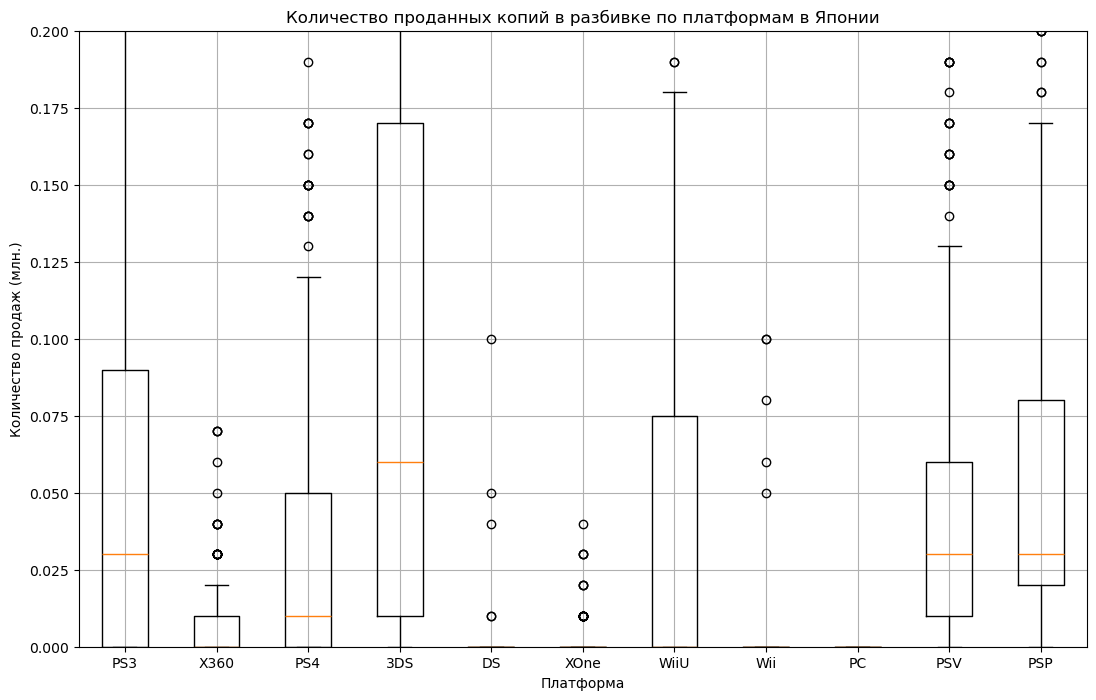

In [67]:
list_p_jp=[]
for i in df['platform'].unique():
    list_p_jp.append(df[df['platform']==i]['jp_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_p_jp[:])
ax.set_xticklabels(df['platform'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Платформа');
plt.grid();
plt.ylim(0,0.2);
plt.title('Количество проданных копий в разбивке по платформам в Японии');

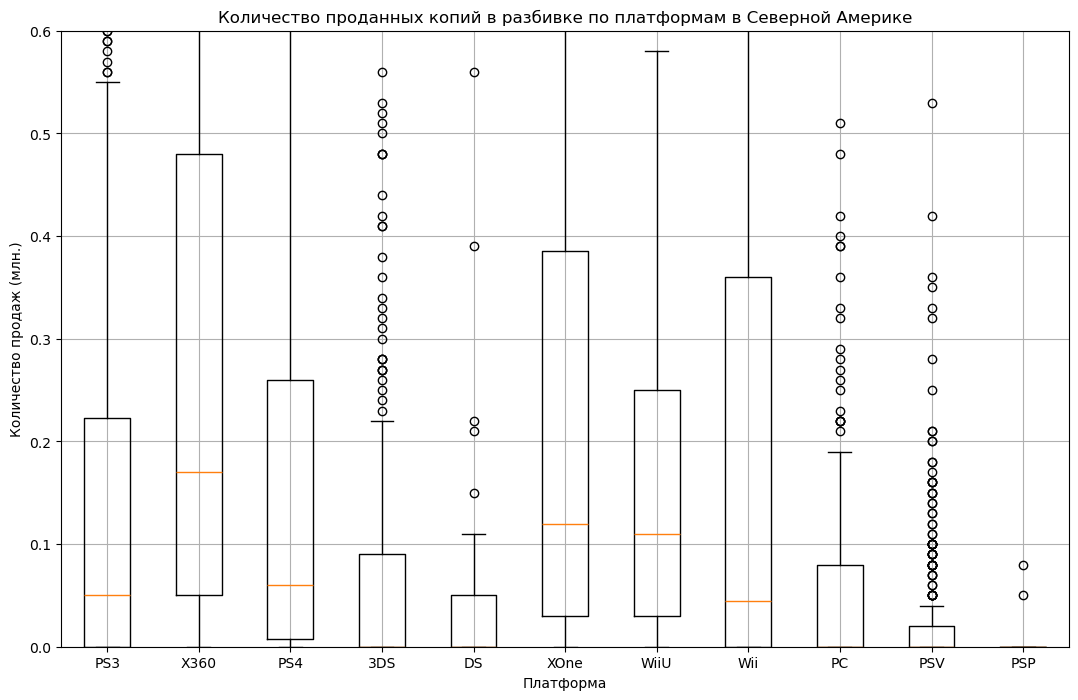

In [68]:
list_p_n=[]
for i in df['platform'].unique():
    list_p_n.append(df[df['platform']==i]['na_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_p_n[:])
ax.set_xticklabels(df['platform'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Платформа');
plt.grid();
plt.ylim(0,0.6);
plt.title('Количество проданных копий в разбивке по платформам в Северной Америке');

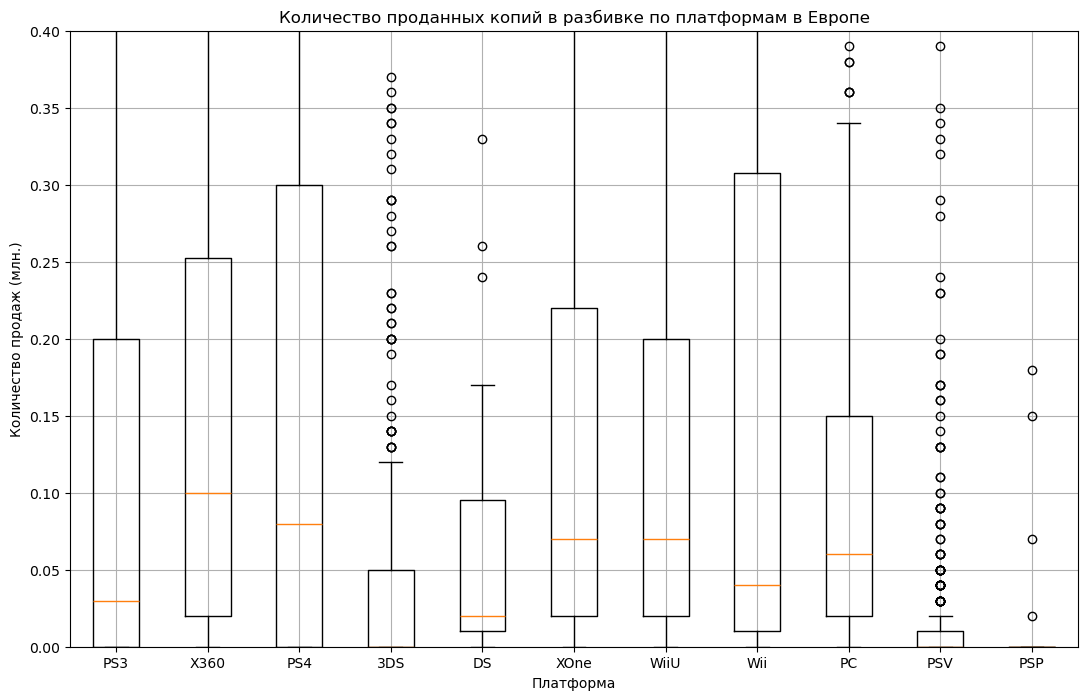

In [69]:
list_p_eu=[]
for i in df['platform'].unique():
    list_p_eu.append(df[df['platform']==i]['eu_sales'])

fig, ax = plt.subplots()
ax.boxplot(list_p_eu[:])
ax.set_xticklabels(df['platform'].unique()[:]);
plt.ylabel('Количество продаж (млн.)');
plt.xlabel('Платформа');
plt.grid();
plt.ylim(0,0.4);
plt.title('Количество проданных копий в разбивке по платформам в Европе');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 


Построив диаграммы "ящик с усами" по продажам игр в трех изучаемых регионах за установленный интервал в разрезе платформ, можно заметить, что в Японии "3DS", "PS3" и "PSP" - платформы - лидеры по продажам,
в Северной Америке и Европе ими можно считать платформы "Wii", "PS4", "X360" и "Xone".
        
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

    
Сравнив портреты пользователей Европы, Японии и Северной Америки с поправкой на установленный временной интервал можно сделать следующие выводы:

* в Японии самые популярные игры - игры с рейтингом "Unknown", "T" и "M", а в Северной Америке, так же как и в Европе - "M", "E10" и "E”;
* в Японии самые популярные игры - игры в жанрах "Role-Playing" "Misc", "Fighting" и "Puzzle". В Северной Америке и Европе лидируют игры в жанрах "Shooter" и "Platform", однако в Северной Америке 2 место делят игры в жанрах "Platform" и "Sports", тогда как в Европе на 3 месте "Racing";
* в Японии "3DS", "PS3" и "PSP" - платформы - лидеры по продажам, в Северной Америке и Европе ими можно считать платформы "Wii", "PS4", "X360" и "Xone".

Учитывая вышеназванные тезисы, можно сделать вывод о том, что портреты Европы и Северной Америки схожи и стратегия кампании на 2017 год для этих регионов может быть одинакова, тогда как для Японии она должна отличаться, так как потребительские тренды в этом регионе могут отличаться от остальных.


</div>

#### Проверка гипотез

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Необходимо выяснить одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC. 
Для этого, используя выборки рейтингов игр платформ 'XOne' и 'PC', необходимо выяснить, одинаковы ли средние их выборок.

Нулевую и альтернативную гипотезы можно сформулировать так:

* HO: Средние пользовательские рейтинги платформ Xbox One и PC равны;
* H1: Средние пользовательские рейтинги платформ Xbox One и PC НЕ равны.

В данном случае альтернативная гипотеза является двухсторонней, поэтому будем использовать `ttest_ind`

In [70]:
df.query('platform=="XOne"')['user_score'].mean()

6.5214286

In [71]:
df.query('platform=="PC"')['user_score'].mean()

6.428641

In [72]:
alpha = 0.05

samp1 = df.query('(platform=="XOne") & (user_score.notna())')['user_score']

samp2 = df.query('(platform=="PC") & (user_score.notna())')['user_score']

result = st.ttest_ind(samp1,samp2,equal_var=False)

display(f'Среднее значение первой выборки: {samp1.mean()}')
display(f'Среднее значение второй выборки: {samp2.mean()}')
display(f'p-value: {result.pvalue}')

if result.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'Среднее значение первой выборки: 6.521428108215332'

'Среднее значение второй выборки: 6.428640842437744'

'p-value: 0.5489560463017016'

'Не получилось отвергнуть нулевую гипотезу'

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

    
    
В результате теста мы узнали, что верноятность того, что средние выборок оценок пользователей платформы "XOne" и платформы "PC", за период полсе 2011 года, равны превысила 5%, поэтому нулевую гипотезу стоит принять: "Средние пользовательские рейтинги платформ Xbox One и PC равны"
    
    
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 
Необходимо выяснить разные ли средние пользовательские рейтинги жанров Action и Sports. 
Для этого, используя выборки рейтингов игр жанров Action и Sports, необходимо выяснить, одинаковы ли средние их выборок.

Нулевую и альтернативную гипотезы можно сформулировать так:

* HO: Средние пользовательские рейтинги игр жанров Action и Sports равны;
* H1: Средние пользовательские рейтинги игр жанров Action и Sports не равны.

В данном случае альтернативная гипотеза также является двухсторонней, поэтому также будем использовать `ttest_ind`

In [73]:
alpha = 0.05

samp1 = df.query('(genre=="Action") & (user_score.notna())')['user_score']

samp2 = df.query('(genre=="Sports") & (user_score.notna())')['user_score']

result = st.ttest_ind(samp1,samp2,equal_var=False)

display(f'Среднее значение первой выборки: {samp1.mean()}')
display(f'Среднее значение второй выборки: {samp2.mean()}')
display(f'p-value: {result.pvalue}')

if result.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'Среднее значение первой выборки: 6.825047969818115'

'Среднее значение второй выборки: 5.455669403076172'

'p-value: 5.989172574568752e-20'

'Отвергаем нулевую гипотезу'

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> 

    
В результате теста мы узнали, что верноятность того, что средние выборок оценок пользователей жанров Action и Sports равны превысила не 5%, поэтому нулевую стоит отвергнуть в пользу альтернативной: "Средние пользовательские рейтинги игр жанров Action и Sports не равны".
    
</div>

#### Общий вывод

В ходе анализа были решены следующие задачи:


* загрузижены и обработанны данные, которые мы получили;
* проведен исследовательский анализ данных;
* составлены портреты пользователей регионов;
* проверены основные гипотезы.


Исслодовательский анализ показал, что:
* характерным сроком существования платформы на рынке можно считать 8-10 лет, однако уже после 4-6 лет продажи игр на эти платформы начинают значительно снижаться;

* больше всего копий игр было продано в жанрах "Action", "Sports" и "Shooter", меньше всего копий было продано в жанрах "Strategy", "Adventure" и "Puzzle”.

* чаще всего игры выпускались в жанрах "Action", "Sports" и "Mics", меньше всего выпускались в жанрах "Strategy", "Platform" и "Puzzle”.

* больше проданных копий приходится на жанры "Adventure", "Strategy" и "Puzzle".

Так же исслодовательский анализ показал, что оценки пользователей и критиков не влияют на успешность продаж игр, а за высокими показателями общих продаж скрываяются множество мелких игр с низкими продажами как в случае с играми в жанрах "Action" и "Role-Playing"  и "Misc" и большим спросом пользуются игры жанров "Shooter", "Sports" и "Platform. 

Сравнив портреты пользователей, с учетом актуального временного промежутка для анализа, Европы, Японии и Северной Америки можно сделать следующие выводы:

* в Японии самые популярные игры - игры с рейтингом "Unknown", "T" и "M", а в Северной Америке, так же как и в Европе - "M", "E10" и "E”;
* в Японии самые популярные игры - игры в жанрах "Role-Playing" "Misc", "Fighting" и "Puzzle". В Северной Америке и Европе лидируют игры в жанрах "Shooter" и "Platform", однако в Северной Америке 2 место делят игры в жанрах "Platform" и "Sports", тогда как в Европе на 3 месте "Racing";
* в Японии "3DS", "PS3" и "PSP" - платформы - лидеры по продажам, в Северной Америке и Европе ими можно считать платформы "Wii", "PS4", "X360" и "Xone".

По результатам проведенных тестов мы узнали, что:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги игр жанров Action и Sports не равны.